<a href="https://colab.research.google.com/github/ZeynelAbidin91/DL-in-Computer-vision/blob/master/pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN for Pneumonia Detection (Assignment 3)
Zeynel Abidin Karadis

# Downloading and Unzipping The dataset from Kaggle API 

To reach Kaggle API

In [2]:
! pip install -q kaggle 

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zeynel91","key":"b5c4534489a1b7a6f4ca1d0f10d77844"}'}

In [4]:
 !mkdir ~/.kaggle
 !cp kaggle.json ~/.kaggle/

In [5]:
 !chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia # to download the chest_xray image set

100% 2.29G/2.29G [00:31<00:00, 33.8MB/s]
100% 2.29G/2.29G [00:31<00:00, 78.7MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip # to unzip the downloaded zipped dataset

In [8]:
import os
mainDIR = os.listdir('chest_xray/chest_xray/')
print(mainDIR)

['val', 'test', 'train', '.DS_Store']


In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
train_folder= 'chest_xray/chest_xray/train/'
val_folder = 'chest_xray/chest_xray/val/'
test_folder = 'chest_xray/chest_xray/test/'

In [11]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

1342
normal picture title:  NORMAL2-IM-1116-0001-0001.jpeg
pneumonia picture title: person569_bacteria_2362.jpeg


Text(0.5, 1.0, 'Pneumonia')

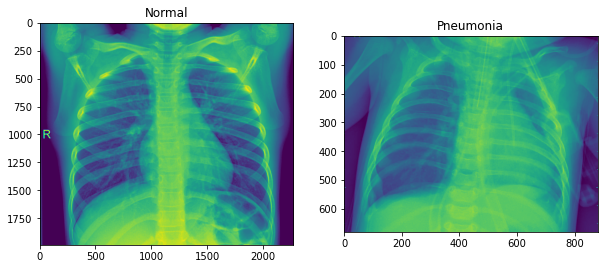

In [12]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

# Data augmentation with ImageDataGenerator

In [13]:
from keras.preprocessing.image import ImageDataGenerator 

In [14]:
train_data_gen = ImageDataGenerator(rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True) # augmentation methods for train set

scaled_data_gen = ImageDataGenerator(rescale=1.0/255) # augmentation is not applied on test and validation sets

In [15]:
train_set = train_data_gen.flow_from_directory('chest_xray/chest_xray/train/', 
                                                   target_size=(150, 150),
                                                   class_mode='binary', 
                                                   batch_size=16)
val_set = scaled_data_gen.flow_from_directory('chest_xray/chest_xray/val/', 
                                                   target_size=(150, 150),
                                                   class_mode='binary',
                                                   batch_size=16)
test_set = scaled_data_gen.flow_from_directory('chest_xray/chest_xray/test/', 
                                                   target_size=(150, 150),
                                                   class_mode='binary', 
                                                   batch_size=16)
# files converted to datasets from folder

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
input_shape = train_set[0][0].shape[1:4] # shape of inputs for CNN model

In [2]:
# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)

In [3]:
input_shape = (150, 150, 3)

# Model1 Implementation

In [4]:
def cnn_model1():
  model = Sequential()
  model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid',
                 input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=pool_size))
  model.add(Flatten())
  model.add(Dense(units=128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

  return model

In [5]:
model1 = cnn_model1() 

In [7]:
model1.summary() # architecture of Model 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               22429824  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
%%time

epochs = 20

#fitting train data to CNN model
history = model1.fit(train_set,steps_per_epoch=len(train_set), 
                              epochs=epochs, validation_data=val_set, 
                              validation_steps=len(val_set))

Epoch 1/20
326/326 [==============================] - 79s 242ms/step - loss: 0.4636 - accuracy: 0.7446 - val_loss: 0.7158 - val_accuracy: 0.5000
Epoch 2/20
326/326 [==============================] - 77s 237ms/step - loss: 0.4541 - accuracy: 0.7465 - val_loss: 0.7814 - val_accuracy: 0.5625
Epoch 3/20
326/326 [==============================] - 77s 235ms/step - loss: 0.4334 - accuracy: 0.7759 - val_loss: 0.7529 - val_accuracy: 0.6250
Epoch 4/20
326/326 [==============================] - 76s 234ms/step - loss: 0.4108 - accuracy: 0.8000 - val_loss: 1.1897 - val_accuracy: 0.5625
Epoch 5/20
326/326 [==============================] - 76s 234ms/step - loss: 0.4127 - accuracy: 0.8106 - val_loss: 0.7976 - val_accuracy: 0.6250
Epoch 6/20
326/326 [==============================] - 77s 236ms/step - loss: 0.3585 - accuracy: 0.8397 - val_loss: 0.5920 - val_accuracy: 0.7500
Epoch 7/20
326/326 [==============================] - 76s 235ms/step - loss: 0.3382 - accuracy: 0.8493 - val_loss: 0.7970 - val_ac

Text(0.5, 1.0, 'accuracy')

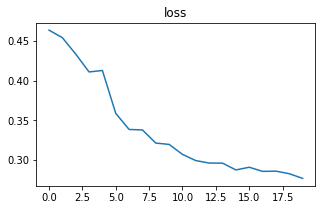

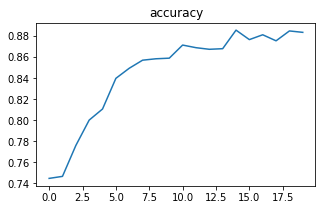

In [ ]:
plt.figure(figsize=(5,3)) # plotting loss and train accuracy through epochs
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy')

In [ ]:
# evaluate performance on train & test data
loss, acc = model1.evaluate_generator(train_set, steps=len(train_set), verbose=1)
print('Training data  -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = model1.evaluate_generator(val_set, steps=len(val_set), verbose=1)
print('Cross-val data -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = model1.evaluate_generator(test_set, steps=len(test_set), verbose=1)
print('Testing data   -> loss: %.3f, acc: %.3f' % (loss, acc))

326/326 [==============================] - 73s 224ms/step - loss: 0.2591 - accuracy: 0.8980
Training data  -> loss: 0.259, acc: 0.898
1/1 [==============================] - 0s 1ms/step - loss: 1.1784 - accuracy: 0.6875
Cross-val data -> loss: 1.178, acc: 0.688
39/39 [==============================] - 5s 131ms/step - loss: 0.5777 - accuracy: 0.8269
Testing data   -> loss: 0.578, acc: 0.827


# Model2 Implementation

In [8]:
def cnn_model2():
  model = Sequential()
  model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid',
                 input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=pool_size))
  model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid',
                 input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=pool_size))
  model.add(Flatten())
  model.add(Dense(units=128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

  return model

In [10]:
model2.summary() # architecture of Model 2

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_2 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_3 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)            

In [ ]:
%%time
model2 = cnn_model2() 

epochs = 20

#fitting train data to CNN model
history = model2.fit(train_set,steps_per_epoch=len(train_set), 
                              epochs=epochs, validation_data=val_set, 
                              validation_steps=len(val_set))

Epoch 1/20
326/326 [==============================] - 75s 231ms/step - loss: 0.4976 - accuracy: 0.7498 - val_loss: 0.8637 - val_accuracy: 0.5000
Epoch 2/20
326/326 [==============================] - 73s 224ms/step - loss: 0.3876 - accuracy: 0.8108 - val_loss: 0.6203 - val_accuracy: 0.7500
Epoch 3/20
326/326 [==============================] - 72s 221ms/step - loss: 0.3618 - accuracy: 0.8361 - val_loss: 0.4680 - val_accuracy: 0.8750
Epoch 4/20
326/326 [==============================] - 72s 221ms/step - loss: 0.3241 - accuracy: 0.8503 - val_loss: 0.4982 - val_accuracy: 0.8125
Epoch 5/20
326/326 [==============================] - 72s 222ms/step - loss: 0.3194 - accuracy: 0.8631 - val_loss: 0.7490 - val_accuracy: 0.6250
Epoch 6/20
326/326 [==============================] - 72s 221ms/step - loss: 0.2980 - accuracy: 0.8679 - val_loss: 0.6668 - val_accuracy: 0.8125
Epoch 7/20
326/326 [==============================] - 71s 219ms/step - loss: 0.2974 - accuracy: 0.8687 - val_loss: 0.5239 - val_ac

Text(0.5, 1.0, 'validation accuracy')

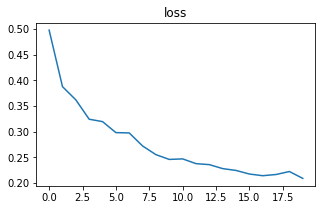

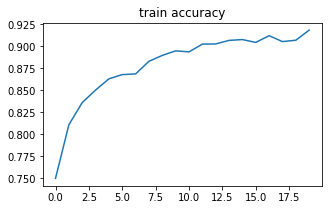

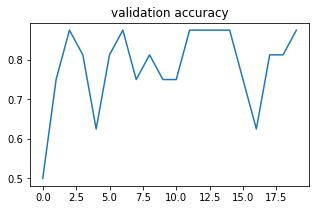

In [ ]:
plt.figure(figsize=(5,3)) # plotting loss, train accuracy and validation accuracy through epochs
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('train accuracy')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['val_accuracy'])
plt.title('validation accuracy')

In [ ]:
# evaluate performance on train & test data
loss, acc = model2.evaluate_generator(train_set, steps=len(train_set), verbose=1)
print('Training data  -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = model2.evaluate_generator(val_set, steps=len(val_set), verbose=1)
print('Cross-val data -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = model2.evaluate_generator(test_set, steps=len(test_set), verbose=1)
print('Testing data   -> loss: %.3f, acc: %.3f' % (loss, acc))

326/326 [==============================] - 73s 223ms/step - loss: 0.1874 - accuracy: 0.9235
Training data  -> loss: 0.187, acc: 0.924
1/1 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.8750
Cross-val data -> loss: 0.659, acc: 0.875
39/39 [==============================] - 5s 139ms/step - loss: 0.5490 - accuracy: 0.7853
Testing data   -> loss: 0.549, acc: 0.785


#Model3 Implementation

In [11]:
def cnn_model3():
  model = Sequential()
  model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid',
                 input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=pool_size))
  model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid',
                 input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=pool_size))
  model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid',
                 input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=pool_size))

  model.add(Flatten())
  model.add(Dense(units=128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
  return model

In [13]:
model3.summary() # architecture of Model 3

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)       

In [22]:
%%time
model3 = cnn_model3() 

epochs = 20

#fitting train data to CNN model
history = model3.fit(train_set,steps_per_epoch=len(train_set), 
                              epochs=epochs, validation_data=val_set, 
                              validation_steps=len(val_set))

Epoch 1/20
326/326 [==============================] - 79s 241ms/step - loss: 0.4980 - accuracy: 0.7571 - val_loss: 0.7888 - val_accuracy: 0.6875
Epoch 2/20
326/326 [==============================] - 79s 242ms/step - loss: 0.3687 - accuracy: 0.8188 - val_loss: 0.9600 - val_accuracy: 0.6250
Epoch 3/20
326/326 [==============================] - 79s 241ms/step - loss: 0.3278 - accuracy: 0.8533 - val_loss: 0.4547 - val_accuracy: 0.7500
Epoch 4/20
326/326 [==============================] - 78s 241ms/step - loss: 0.3160 - accuracy: 0.8623 - val_loss: 0.5230 - val_accuracy: 0.6875
Epoch 5/20
326/326 [==============================] - 78s 241ms/step - loss: 0.2877 - accuracy: 0.8748 - val_loss: 0.3722 - val_accuracy: 0.8125
Epoch 6/20
326/326 [==============================] - 79s 241ms/step - loss: 0.2626 - accuracy: 0.8900 - val_loss: 0.4228 - val_accuracy: 0.6875
Epoch 7/20
326/326 [==============================] - 78s 240ms/step - loss: 0.2397 - accuracy: 0.8955 - val_loss: 0.4934 - val_ac

Text(0.5, 1.0, 'validation accuracy')

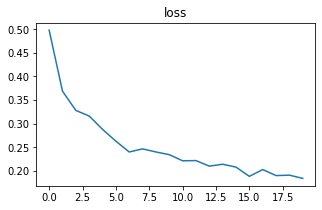

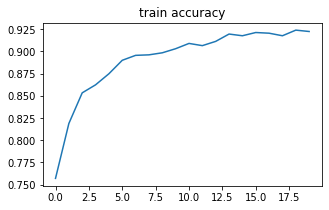

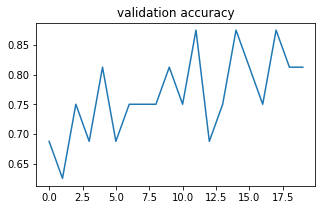

In [23]:
plt.figure(figsize=(5,3)) # plotting loss, train accuracy and validation accuracy through epochs
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('train accuracy')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['val_accuracy'])
plt.title('validation accuracy')

In [24]:
# evaluate performance on train & test data
loss, acc = model3.evaluate_generator(train_set, steps=len(train_set), verbose=1)
print('Training data  -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = model3.evaluate_generator(val_set, steps=len(val_set), verbose=1)
print('Cross-val data -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = model3.evaluate_generator(test_set, steps=len(test_set), verbose=1)
print('Testing data   -> loss: %.3f, acc: %.3f' % (loss, acc))

326/326 [==============================] - 77s 237ms/step - loss: 0.1506 - accuracy: 0.9385
Training data  -> loss: 0.151, acc: 0.938
1/1 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8125
Cross-val data -> loss: 0.363, acc: 0.812
39/39 [==============================] - 6s 144ms/step - loss: 0.3232 - accuracy: 0.8750
Testing data   -> loss: 0.323, acc: 0.875



Model | Train | Cross-val | Test
---| --- | --- | ---
Model1 | 0.898 | 0.688 | 0.827
Model2 | 0.924 | 0.875 | 0.785
Model3 | 0.938 | 0.812 | 0.875 



# Evaluation of 3 CNN models

*   We have 3 different CNN models that differs from each other with only one more CNN layers. The results show that 'model3' that has the largest number of CNN layers has the best accuracy outputs
*   However adding more CNN layers doesn't always improve the accuracy. Whereas 'model1' has only one CNN layer, it returns with better output on test set than 'model2' which includes 2 CNN layers.
*   From accuracy and loss plots, it can be assumed that with more epochs the better results can be obtained. 





# Samples of Predicted Images

In [98]:
test_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [94]:
x_test, y_test = test_set.next()
y_test

array([1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
      dtype=float32)

In [95]:
predictions = model3.predict_classes(x_test) # predicting labels of a batch of test set 
predictions = predictions.reshape(1,-1)[0] # to reshape predicted label array as (1,batch_size)

In [105]:
correct = np.nonzero(predictions == y_test)[0] # collecting correct and incorrect predicted values to show them
incorrect = np.nonzero(predictions != y_test)[0]
incorrect.shape

(3,)

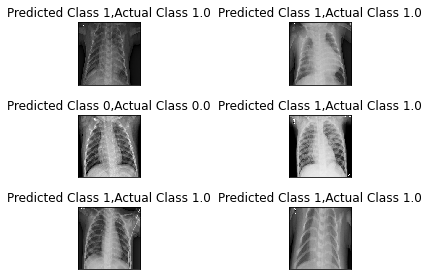

In [107]:
i = 0 # Sample of correct predicted values
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c], cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

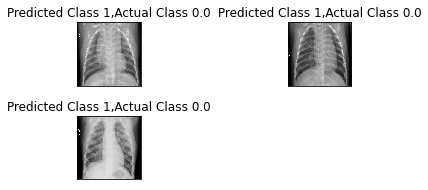

In [106]:
i = 0 # Sample of incorrect predicted values
for inc in incorrect:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[inc], cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[inc], y_test[inc]))
    plt.tight_layout()
    i += 1

It seems we have only 3 incorrect predicted label in this batch!!